In [6]:
type(pic1)

numpy.ndarray

In [3]:
weight2.shape

(5, 5, 3, 6)

In [ ]:
#test accuracy for 34/36: 1.0, other 2: 0.0 (18&35 from 1)
import numpy as np
import matplotlib.pyplot as plt
from rotate import get_img_rot_broa as rotate
from loadone import load_sample as load
from convo import conv2d,maxpool2d,conv_net
import tensorflow as tf
from con import train_cov
from weight import wei
wei()
# data=np.load('data.npy')
# weight=np.zeros((5,5,1,3,8,36))
# weightt=np.zeros((5,5,3,6,8,36))
# for i in range (0,36):
#     for j in range (0,8):
#         M1,a1=load(data[:,:,j,i])
#         weight[:,:,:,:,j,i],weightt[:,:,:,:,j,i]=train_cov(data[:,:,j,i])
#     np.save('weight8.npy',weight)
#     np.save('weightt8.npy',weightt)

# pic1=data[:,:,0,0].reshape(28,28)
# pic2=rotate(np.uint8(pic1), degree=45, filled_color=[255,255,255])
# plt.imshow(pic2[6:34,6:34])

In [ ]:
# from scipy.signal import convolve2d
def prep(pic,weight1,weight2):
    n=weight1.shape[4]
    M=np.zeros((n,pic.shape[2],294))
    with tf.Session() as sess:
        p=np.zeros((pic.shape[2],784))
        for i in range(0,pic.shape[2]):
            p[i,:]=pic[:,:,i].reshape(784,)
        p=tf.reshape(p, shape=[-1, 28, 28, 1])
        for k in range (0,n):
            I=conv2d(p, weight1[:,:,:,:,k].reshape(5,5,1,3))
            I=maxpool2d(I,k=2)
            I1 = conv2d(I, weight2[:,:,:,:,k].reshape(5,5,3,6))
        # Max Pooling (down-sampling)
            I1 = maxpool2d(I1, k=2)
            I1=tf.reshape(I1,[-1,294]).eval()
        M[k,:,:]=I1
    return M

In [6]:
prep(data[:,:,:,0].reshape(28,28,16),weight,weightt)

TypeError: conv2d() missing 1 required positional argument: 'b'

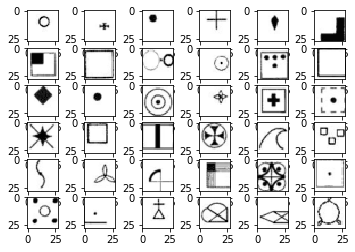

In [16]:
for i in range (0,36):
    plt.subplot(6,6,i+1)
    plt.imshow(data[:,:,0,i],cmap='gray')

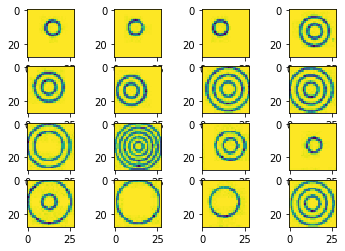

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,0])
    

In [3]:
from con import train_cov
from loadone import load_sample as load
w1=np.zeros((5,5,1,3,8))
w2=np.zeros((5,5,3,6,8))
for j in range (0,8):
    M12,a12=load(data[:,:,j,12])
    w1[:,:,:,:,j],w2[:,:,:,:,j]=train_cov(data[:,:,j,12])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 6355.8599, Train Accuracy= 0.500
Step 50, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 1.0
Step 1, Minibatch Loss= 6066.5762, Train Accuracy= 0.250
Step 50, Minibatch Loss= 608.6329, Train Accuracy= 0.875
Testing Accuracy: 1.0
Step 1, Minibatch Loss= 1386.7379, Train Accuracy= 0.875
Step 50, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 1.0
Step 1, Minibatch Loss= 427.5784, Train Accuracy= 0.125
Step 50, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 0.0
Step 1, Minibatch Loss= 2173.4365, Train Accuracy= 0.500
Step 50, Minibatch Loss= 0.0

In [4]:
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,12].reshape(28,28,16),w1[:,:,:,:,:],w2[:,:,:,:,:],answer[12])

Step 1, Minibatch Loss= 172450.4844, Train Accuracy= 0.375
Step 10, Minibatch Loss= 37811.8828, Train Accuracy= 0.750
Step 20, Minibatch Loss= 18332.0469, Train Accuracy= 0.875
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 0.75


(array([[0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.]], dtype=float32), array([[386022.84, 716554.5 ],
        [360547.72, 589116.  ],
        [704121.9 , 687502.25],
        [296365.03, 807418.5 ],
        [492466.6 , 707149.4 ],
        [231774.27, 522519.94],
        [855993.8 , 646766.5 ],
        [874383.94, 318107.38]], dtype=float32))

In [7]:
pp=np.array([[386022.84, 716554.5 ],
        [360547.72, 589116.  ],
        [704121.9 , 687502.25],
        [296365.03, 807418.5 ],
        [492466.6 , 707149.4 ],
        [231774.27, 522519.94],
        [855993.8 , 646766.5 ],
        [874383.94, 318107.38]])

In [10]:
a=np.zeros(8)
for i in range (0,8):
    a[i]=1/(np.exp(-pp[i,0])+1)-1/(np.exp(-pp[i,1])+1)

In [11]:
a

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [1]:
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,12])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 50, Minibatch Loss= 514.0555, Train Accuracy= 0.125
Step 100, Minibatch Loss= 411.1918, Train Accuracy= 0.250
Step 150, Minibatch Loss= 0.0000, Train Accuracy= 1.000


In [3]:
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,12].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[12])

Step 1, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 10, Minibatch Loss= 191702.8281, Train Accuracy= 0.500
Step 20, Minibatch Loss= 73646.3516, Train Accuracy= 0.750
Step 30, Minibatch Loss= 10467.9717, Train Accuracy= 0.875
Testing Accuracy: 1.0


(array([[0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[-237626.03 ,   30390.33 ],
        [-124571.24 ,  -18858.795],
        [  14396.318,  -79140.42 ],
        [ -85377.52 ,   37208.957],
        [-188926.28 ,   23692.299],
        [-182312.34 ,  -15230.732],
        [-238331.   ,  -10412.014],
        [-212037.47 ,  168931.39 ]], dtype=float32))

In [1]:
#n=300,fn=50
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,0])
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,0].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[0])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 21167.1055, Train Accuracy= 0.000
Step 50, Minibatch Loss= 102.9040, Train Accuracy= 0.625
Step 100, Minibatch Loss= 1895.3175, Train Accuracy= 0.000
Step 150, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 200, Minibatch Loss= 1834.2712, Train Accuracy= 0.000
Step 250, Minibatch Loss= 398.5453, Train Accuracy= 0.125
Step 300, Minibatch Loss= 187.2077, Train Accuracy= 0.625
Step 1, Minibatch Loss= 182034.9375, Train Accuracy= 0.375
Step 10, Minibatch Loss= 86685.0156, Train Accuracy= 0.750
Step 20, Minibatch Loss= 75114.2969, Train Accuracy= 0.125
Step 30, Minibatch Loss= 0.0000, Train A

(array([[0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.]], dtype=float32), array([[300041.12, 489611.2 ],
        [359410.34, 340451.94],
        [170819.3 , 502344.12],
        [248771.  , 494867.5 ],
        [228774.6 , 492629.03],
        [183339.5 , 589330.75],
        [210345.48, 417817.8 ],
        [322147.22, 321681.44]], dtype=float32))

In [1]:
#n=300,fn=100
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,0],300)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,0].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[0],100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 50, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 100, Minibatch Loss= 3.5596, Train Accuracy= 0.875
Step 150, Minibatch Loss= 103.2204, Train Accuracy= 0.375
Step 200, Minibatch Loss= 689.9674, Train Accuracy= 0.000
Step 250, Minibatch Loss= 38.7574, Train Accuracy= 0.875
Step 300, Minibatch Loss= 17.5277, Train Accuracy= 0.875
Step 1, Minibatch Loss= 171405.4062, Train Accuracy= 0.250
Step 10, Minibatch Loss= 24916.3281, Train Accuracy= 0.625
Step 20, Minibatch Loss= 56502.7617, Train Accuracy= 0.250
Step 30, Minibatch Loss= 41381.2344, Train Accurac

(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[-548504.3 ,  261608.17],
        [-458832.3 ,  186304.2 ],
        [-746943.5 ,  472568.78],
        [-694744.7 ,  482996.9 ],
        [-644825.  ,  214844.95],
        [-635218.  ,  392802.62],
        [-709748.8 ,  566761.94],
        [-600010.25,  373893.5 ]], dtype=float32))

In [4]:
#n=300,fn=50
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,0],500)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,0].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[0],100)

Step 1, Minibatch Loss= 3478.3093, Train Accuracy= 0.000
Step 50, Minibatch Loss= 4624.8301, Train Accuracy= 0.000
Step 100, Minibatch Loss= 2873.0195, Train Accuracy= 0.000
Step 150, Minibatch Loss= 1043.5162, Train Accuracy= 0.000
Step 200, Minibatch Loss= 443.4563, Train Accuracy= 0.125
Step 250, Minibatch Loss= 31.9310, Train Accuracy= 0.875
Step 300, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 350, Minibatch Loss= 84.5061, Train Accuracy= 0.625
Step 400, Minibatch Loss= 148.9029, Train Accuracy= 0.375
Step 450, Minibatch Loss= 210.1377, Train Accuracy= 0.500
Step 500, Minibatch Loss= 7.5693, Train Accuracy= 0.875
Step 1, Minibatch Loss= 400308.1875, Train Accuracy= 0.375
Step 10, Minibatch Loss= 261744.5469, Train Accuracy= 0.375
Step 20, Minibatch Loss= 101884.0547, Train Accuracy= 0.875
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 40, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 50, Minibatch Loss= 12085.4492, Train Accuracy= 0.875
Step 60, Minibatch 

(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[ 117582.53,  847965.94],
        [ 212697.44,  826866.1 ],
        [  18865.06,  894205.44],
        [-167833.89,  797781.06],
        [ 103250.81,  702796.75],
        [  68300.5 ,  887175.2 ],
        [-114242.16,  921004.3 ],
        [ 250321.16,  975920.5 ]], dtype=float32))

In [1]:
#n=300,fn=50
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,0],1000)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,0].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[0],100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 50, Minibatch Loss= 7347.4482, Train Accuracy= 0.000
Step 100, Minibatch Loss= 2710.5012, Train Accuracy= 0.000
Step 150, Minibatch Loss= 360.7971, Train Accuracy= 0.750
Step 200, Minibatch Loss= 2270.8511, Train Accuracy= 0.000
Step 250, Minibatch Loss= 260.6024, Train Accuracy= 0.625
Step 300, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 350, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 400, Minibatch Loss= 504.3144, Train Accuracy= 0.500
Step 450, Minibatch Loss= 840.9662, Train Accuracy= 0.375
Step 500, Minibatch Loss= 808.4842, Train Accura

(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[-351881.88,  198211.88],
        [-178447.22,  479705.2 ],
        [-194836.72,  423391.22],
        [-327151.53,  413379.62],
        [-252033.72,  335392.56],
        [-235245.03,  383966.28],
        [-296797.9 ,  451944.56],
        [-251668.28,  254922.92]], dtype=float32))

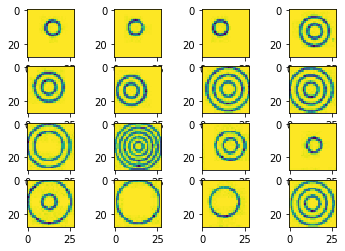

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,0])

In [3]:
#n=300,fn=50
a=12
n=0
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,a))
w2=np.zeros((5,5,a,a*2))
m=np.array([0,1,2])
#M12,a12=load(data[:,:,m,12])
# data_f[:,:,0]=data[:,:,0,0]
# data_f[:,:,1]=data_f1
# data_f[:,:,2]=data_f2
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,0],1000,a,128)
#w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,n],150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,n].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,a,1),w2[:,:,:,:].reshape(5,5,a,2*a,1),answer[n],30,a,8)

Step 1, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 500, Minibatch Loss= 422.9837, Train Accuracy= 0.508
Step 1000, Minibatch Loss= 39.3285, Train Accuracy= 0.891
Step 1, Minibatch Loss= 123495.4297, Train Accuracy= 0.500
Step 10, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 20, Minibatch Loss= 54235.4766, Train Accuracy= 0.875
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 0.875


(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[-2496629.  ,  -376558.34],
        [-2556416.2 ,   175853.81],
        [-2715776.5 ,   208833.94],
        [-2979081.5 ,   291967.44],
        [-2735671.2 ,  -391132.5 ],
        [-2727045.  ,  -294164.4 ],
        [-3109859.5 ,   290402.22],
        [-2361513.8 ,  -440385.72]], dtype=float32))

In [6]:
#n=300,fn=50
a=16
n=0
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,a))
w2=np.zeros((5,5,a,a*2))
m=np.array([0,1,2])
#M12,a12=load(data[:,:,m,12])
# data_f[:,:,0]=data[:,:,0,0]
# data_f[:,:,1]=data_f1
# data_f[:,:,2]=data_f2
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,0],1500,a,128)
#w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,n],150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,n].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,a,1),w2[:,:,:,:].reshape(5,5,a,2*a,1),answer[n],30,a,8)

Step 1, Minibatch Loss= 9140.6152, Train Accuracy= 0.000
Step 500, Minibatch Loss= 6234.4702, Train Accuracy= 0.000
Step 1000, Minibatch Loss= 1576.4797, Train Accuracy= 0.070
Step 1500, Minibatch Loss= 16.8425, Train Accuracy= 0.914
Step 1, Minibatch Loss= 352814.7188, Train Accuracy= 0.875
Step 10, Minibatch Loss= 489639.4375, Train Accuracy= 0.625
Step 20, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 0.875


(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[-1807656.4  ,  -584157.25 ],
        [-1413948.8  ,    -9474.161],
        [-2406698.5  ,   410613.4  ],
        [-2219290.   ,   104730.77 ],
        [-2001261.5  ,   -13964.911],
        [-1347734.   ,   170371.47 ],
        [-2543100.2  ,   475911.03 ],
        [-2041844.   ,   -58985.13 ]], dtype=float32))

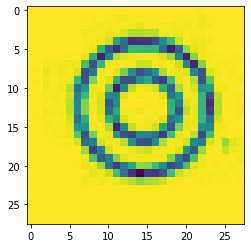

In [3]:
plt.imshow(data[:,:,3,0])

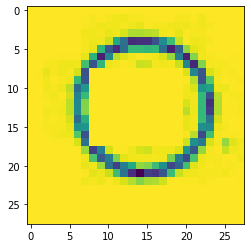

In [13]:
data_f1=data[:,:,3,0].copy()
data_f1[8:18,8:20]=255
plt.imshow(data_f1)

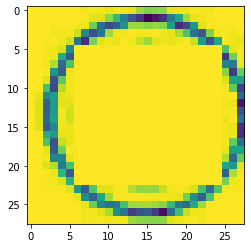

In [22]:
data_f2=data[:,:,6,0].copy()
data_f2[5:23,6:25]=255
plt.imshow(data_f2)

In [27]:
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
data_f=np.zeros((28,28,3))
data_f[:,:,0]=data[:,:,0,0]
data_f[:,:,1]=data_f1
data_f[:,:,2]=data_f2
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data_f,1000)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,0].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[0],50)

Step 1, Minibatch Loss= 3651.0928, Train Accuracy= 0.000
Step 50, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 100, Minibatch Loss= 11.6090, Train Accuracy= 0.750
Step 150, Minibatch Loss= 89.4796, Train Accuracy= 0.500
Step 200, Minibatch Loss= 591.4128, Train Accuracy= 0.000
Step 250, Minibatch Loss= 176.9128, Train Accuracy= 0.125
Step 300, Minibatch Loss= 4.8164, Train Accuracy= 0.875
Step 350, Minibatch Loss= 344.1665, Train Accuracy= 0.000
Step 400, Minibatch Loss= 362.7882, Train Accuracy= 0.000
Step 450, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 500, Minibatch Loss= 298.4826, Train Accuracy= 0.000
Step 550, Minibatch Loss= 273.7556, Train Accuracy= 0.000
Step 600, Minibatch Loss= 50.9212, Train Accuracy= 0.625
Step 650, Minibatch Loss= 82.9581, Train Accuracy= 0.375
Step 700, Minibatch Loss= 134.1780, Train Accuracy= 0.125
Step 750, Minibatch Loss= 171.9923, Train Accuracy= 0.125
Step 800, Minibatch Loss= 12.2537, Train Accuracy= 0.750
Step 850, Minibatch Loss= 5

(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[-34154.113 , 184265.78  ],
        [-62279.56  , 145706.08  ],
        [ -6106.0034, 217450.47  ],
        [-32085.988 , 241814.69  ],
        [ 36948.465 , 208371.03  ],
        [  1504.5591, 182925.25  ],
        [-39185.22  , 213338.66  ],
        [-39397.46  , 195446.5   ]], dtype=float32))

In [7]:
#n=300,fn=50
a=12
n=0
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,a))
w2=np.zeros((5,5,a,a*2))
m=np.array([0,1,2])
#M12,a12=load(data[:,:,m,12])
data_f[:,:,0]=data[:,:,0,0]
data_f[:,:,1]=data_f1
data_f[:,:,2]=data_f2
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data_f,2000,a,128)
#w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,n],150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,n].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,a,1),w2[:,:,:,:].reshape(5,5,a,2*a,1),answer[n],30,a,8)

Step 1, Minibatch Loss= 1972.3689, Train Accuracy= 0.484
Step 500, Minibatch Loss= 238.6772, Train Accuracy= 0.859
Step 1000, Minibatch Loss= 485.9279, Train Accuracy= 0.773
Step 1500, Minibatch Loss= 600.2037, Train Accuracy= 0.688
Step 2000, Minibatch Loss= 49.3965, Train Accuracy= 0.898
Step 1, Minibatch Loss= 2850984.5000, Train Accuracy= 0.250
Step 10, Minibatch Loss= 719727.5000, Train Accuracy= 0.375
Step 20, Minibatch Loss= 212220.4219, Train Accuracy= 0.625
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 0.625


(array([[0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[1300532.5, 1816531.1],
        [1732287.9, 1657738.4],
        [1078926.9, 2078650. ],
        [1080351.9, 2165448.2],
        [1756235.6, 1812267.2],
        [1806047.1, 1364072. ],
        [ 945193.7, 2314415.5],
        [1443234.1, 1540935.4]], dtype=float32))

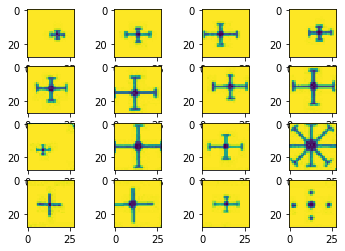

In [29]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,1])

In [30]:
#n=300,fn=50
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,1,2,5])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,1],150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,1].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[1],30)

Step 1, Minibatch Loss= 3726.6582, Train Accuracy= 0.000
Step 50, Minibatch Loss= 622.7898, Train Accuracy= 0.000
Step 100, Minibatch Loss= 152.7583, Train Accuracy= 0.250
Step 150, Minibatch Loss= 151.0107, Train Accuracy= 0.000
Step 1, Minibatch Loss= 82404.9062, Train Accuracy= 0.375
Step 10, Minibatch Loss= 57307.4375, Train Accuracy= 0.750
Step 20, Minibatch Loss= 12579.0859, Train Accuracy= 0.750
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 0.875


(array([[0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[106531.46, 345942.8 ],
        [347162.72, 285784.8 ],
        [146578.34, 283534.7 ],
        [292434.2 , 248659.94],
        [142477.23, 283168.8 ],
        [294413.8 , 313908.75],
        [141613.3 , 281474.94],
        [236107.67, 307164.22]], dtype=float32))

In [32]:
#n=300,fn=50
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,1,2,5])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,1],300)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,1].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[1],30)

Step 1, Minibatch Loss= 8987.1250, Train Accuracy= 0.000
Step 50, Minibatch Loss= 204.1210, Train Accuracy= 0.750
Step 100, Minibatch Loss= 60.0082, Train Accuracy= 0.875
Step 150, Minibatch Loss= 89.1530, Train Accuracy= 0.625
Step 200, Minibatch Loss= 726.2486, Train Accuracy= 0.250
Step 250, Minibatch Loss= 833.1234, Train Accuracy= 0.000
Step 300, Minibatch Loss= 456.3002, Train Accuracy= 0.000
Step 1, Minibatch Loss= 632047.1875, Train Accuracy= 0.375
Step 10, Minibatch Loss= 206929.6406, Train Accuracy= 0.250
Step 20, Minibatch Loss= 93348.0703, Train Accuracy= 0.750
Step 30, Minibatch Loss= 23505.4980, Train Accuracy= 0.625
Testing Accuracy: 0.125


(array([[1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32), array([[ 229991.86 ,   79462.27 ],
        [ -40058.87 ,  171150.31 ],
        [ 203715.62 ,  100634.96 ],
        [-191773.42 ,  189384.5  ],
        [ 232285.69 ,   91792.99 ],
        [ 192550.12 ,   36095.93 ],
        [ 255828.34 ,   97987.836],
        [ 240100.64 ,   52214.15 ]], dtype=float32))

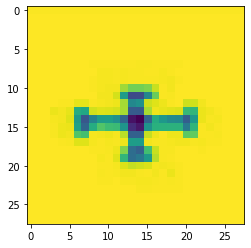

In [46]:
plt.imshow(data[:,:,1,1])

In [48]:
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
data_f=np.zeros((28,28,2))
data_f[:,:,0]=data[:,:,1,1]
data_f[:,:,1]=np.ones((28,28))*255
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data_f,150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,1].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[1],30)

Step 1, Minibatch Loss= 2783.2188, Train Accuracy= 0.000
Step 50, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 100, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 150, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 1, Minibatch Loss= 1112769.6250, Train Accuracy= 0.500
Step 10, Minibatch Loss= 58954.4062, Train Accuracy= 0.875
Step 20, Minibatch Loss= 98831.6953, Train Accuracy= 0.625
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 0.875


(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[-1655227.2  ,  -229855.69 ],
        [-2066794.9  ,  -641941.1  ],
        [-2185563.   ,  -400112.2  ],
        [-2061866.5  ,  -656304.44 ],
        [-1726378.2  ,  -462323.3  ],
        [-2322731.   ,  -255369.94 ],
        [-1914293.2  ,  -333038.3  ],
        [-2153426.5  ,     6451.308]], dtype=float32))

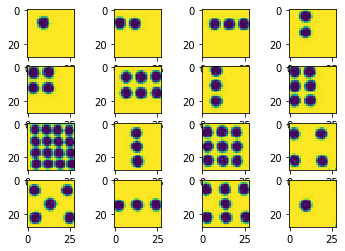

In [33]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,2])

In [35]:
#n=300,fn=50
n=2
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,2,7])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,n],300)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,n].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[n],30)

Step 1, Minibatch Loss= 13784.0117, Train Accuracy= 0.000
Step 50, Minibatch Loss= 1417.0743, Train Accuracy= 0.000
Step 100, Minibatch Loss= 54.1057, Train Accuracy= 0.750
Step 150, Minibatch Loss= 24.0454, Train Accuracy= 0.875
Step 200, Minibatch Loss= 44.1890, Train Accuracy= 0.625
Step 250, Minibatch Loss= 17.3946, Train Accuracy= 0.875
Step 300, Minibatch Loss= 8.0343, Train Accuracy= 0.875
Step 1, Minibatch Loss= 569868.1250, Train Accuracy= 0.375
Step 10, Minibatch Loss= 172716.3125, Train Accuracy= 0.750
Step 20, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 0.875


(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[ -759827.8 ,   699154.1 ],
        [ -992699.8 ,   801787.25],
        [-1634544.2 ,   738209.1 ],
        [-1424539.  ,   617227.4 ],
        [ -956651.5 ,   768482.25],
        [-1682062.6 ,   822198.94],
        [ -771654.94,  1204603.  ],
        [-1286157.2 ,   547959.25]], dtype=float32))

In [36]:
#n=300,fn=50
n=2
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,2,7])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,n],150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,n].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[n],30)

Step 1, Minibatch Loss= 1157.6616, Train Accuracy= 0.750
Step 50, Minibatch Loss= 1794.7051, Train Accuracy= 0.500
Step 100, Minibatch Loss= 5172.0459, Train Accuracy= 0.000
Step 150, Minibatch Loss= 858.0014, Train Accuracy= 0.625
Step 1, Minibatch Loss= 755493.8750, Train Accuracy= 0.375
Step 10, Minibatch Loss= 86994.2500, Train Accuracy= 0.750
Step 20, Minibatch Loss= 306741.1562, Train Accuracy= 0.875
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 0.875


(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[1698824.9 , 3814454.5 ],
        [ 186041.98, 2961909.  ],
        [ 808857.4 , 2344177.8 ],
        [1468607.2 , 3761516.  ],
        [1568388.  , 4167969.8 ],
        [ 872082.  , 3787419.8 ],
        [ 684593.5 , 3918477.  ],
        [ 640085.9 , 3989215.2 ]], dtype=float32))

In [ ]:
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
data_f=np.zeros((28,28,2))
data_f[:,:,0]=data[:,:,1,1]
data_f[:,:,1]=np.ones((28,28))*255
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data_f,150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,0].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[0],30)

In [49]:
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
data_f=np.zeros((28,28,2))
data_f[:,:,0]=data[:,:,0,2]
data_f[:,:,1]=np.ones((28,28))*255
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data_f,150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,2].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[2],30)

Step 1, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 50, Minibatch Loss= 985.9059, Train Accuracy= 0.250
Step 100, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 150, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 1, Minibatch Loss= 1451247.7500, Train Accuracy= 0.375
Step 10, Minibatch Loss= 643852.9375, Train Accuracy= 0.250
Step 20, Minibatch Loss= 174880.5000, Train Accuracy= 0.625
Step 30, Minibatch Loss= 302040.6875, Train Accuracy= 0.750
Testing Accuracy: 0.875


(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[-4595449. , -2946431. ],
        [-4594098. , -3042787.2],
        [-4617454. , -3489761.8],
        [-4498813. , -3042151.2],
        [-5738057. , -3292341. ],
        [-5519212. , -2560529.5],
        [-5145384.5, -3425256.5],
        [-4801920. , -2759557.2]], dtype=float32))

In [50]:
#n=300,fn=50
n=2
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,1,2,3,4,5,6,7])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,n],150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,n].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[n],30)

Step 1, Minibatch Loss= 5787.4443, Train Accuracy= 0.000
Step 50, Minibatch Loss= 2436.6672, Train Accuracy= 0.000
Step 100, Minibatch Loss= 1790.1366, Train Accuracy= 0.000
Step 150, Minibatch Loss= 488.2281, Train Accuracy= 0.000


KeyboardInterrupt: 

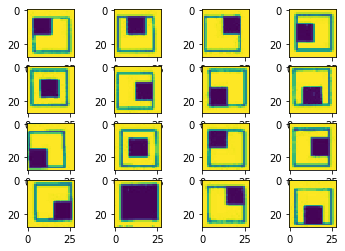

In [53]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,6])

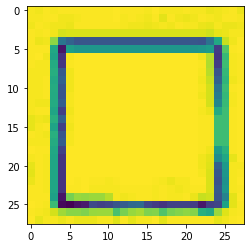

In [57]:
data_f1=data[:,:,9,6].copy()
data_f1[6:22,6:22]=255
plt.imshow(data_f1)

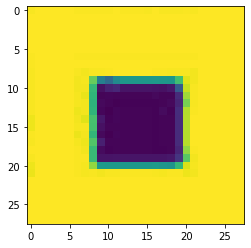

In [63]:
data_f2=data[:,:,9,6].copy()
data_f2[1:6,:]=255
data_f2[:,1:6]=255
data_f2[:,22:28]=255
data_f2[22:28,:]=255
plt.imshow(data_f2)

In [65]:
#n=300,fn=50
n=6
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,2,7])
#M12,a12=load(data[:,:,m,12])
data_f=np.zeros((28,28,2))
data_f1=data[:,:,9,6].copy()
data_f1[6:22,6:22]=255
data_f[:,:,0]=data_f1
data_f2=data[:,:,9,6].copy()
data_f2[1:6,:]=255
data_f2[:,1:6]=255
data_f2[:,22:28]=255
data_f2[22:28,:]=255
data_f[:,:,1]=data_f2
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data_f,150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,n].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[n],30)

Step 1, Minibatch Loss= 27710.1758, Train Accuracy= 0.000
Step 50, Minibatch Loss= 7525.0166, Train Accuracy= 0.000
Step 100, Minibatch Loss= 23.8430, Train Accuracy= 0.875
Step 150, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 1, Minibatch Loss= 3087659.7500, Train Accuracy= 0.375
Step 10, Minibatch Loss= 306936.1250, Train Accuracy= 0.125
Step 20, Minibatch Loss= 530368.4375, Train Accuracy= 0.750
Step 30, Minibatch Loss= 801160.8750, Train Accuracy= 0.375
Testing Accuracy: 0.875


(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[ 1015542.25,  5375579.5 ],
        [ -366327.03,  4757989.5 ],
        [-2005618.5 ,  5346706.5 ],
        [  253354.1 ,  4872809.5 ],
        [  512252.47,  4095135.8 ],
        [-1066562.5 ,  5629692.5 ],
        [ -909158.  ,  4348388.5 ],
        [-1876831.8 ,  5280689.5 ]], dtype=float32))

In [66]:
#n=300,fn=50
n=6
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,2,7])
#M12,a12=load(data[:,:,m,12])
data_f=np.zeros((28,28,2))
data_f1=data[:,:,9,6].copy()
data_f1[6:22,6:22]=255
data_f[:,:,0]=data_f1
data_f2=data[:,:,9,6].copy()
data_f2[1:6,:]=255
data_f2[:,1:6]=255
data_f2[:,22:28]=255
data_f2[22:28,:]=255
data_f[:,:,1]=data_f2
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data_f,150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,n].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[n],100)

Step 1, Minibatch Loss= 177.3688, Train Accuracy= 0.875
Step 50, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 100, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 150, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 1, Minibatch Loss= 35683.5156, Train Accuracy= 0.875
Step 10, Minibatch Loss= 21278.9180, Train Accuracy= 0.625
Step 20, Minibatch Loss= 26589.1602, Train Accuracy= 0.875
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 40, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 50, Minibatch Loss= 50679.7617, Train Accuracy= 0.875
Step 60, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 70, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 80, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 90, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 100, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 0.875


(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[-1361542.1 ,   887842.5 ],
        [-1033718.44,   729554.2 ],
        [-1162618.2 ,   871126.75],
        [ -953959.8 ,   862511.  ],
        [-1071836.1 ,   843760.6 ],
        [-1280696.5 ,   502884.03],
        [-1188805.5 ,   357167.34],
        [-1088638.8 ,   840352.9 ]], dtype=float32))

In [96]:
#n=300,fn=50
n=6
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,2,7])
#M12,a12=load(data[:,:,m,12])
data_f=np.zeros((28,28,2))
data_f1=data[:,:,9,6].copy()
data_f1[6:22,6:22]=255
data_f[:,:,0]=data_f1
data_f2=data[:,:,9,6].copy()
data_f2[1:6,:]=255
data_f2[:,1:6]=255
data_f2[:,22:28]=255
data_f2[22:28,:]=255
data_f[:,:,1]=data_f2
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data_f,150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,n].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[n],50)

Step 1, Minibatch Loss= 9902.9199, Train Accuracy= 0.000
Step 50, Minibatch Loss= 49.9262, Train Accuracy= 0.875
Step 100, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 150, Minibatch Loss= 363.0352, Train Accuracy= 0.375
Step 1, Minibatch Loss= 1843786.5000, Train Accuracy= 0.500


KeyboardInterrupt: 

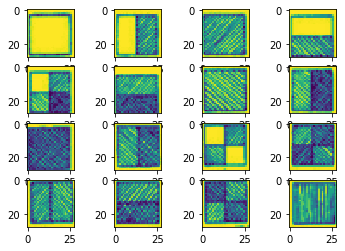

In [70]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,7])

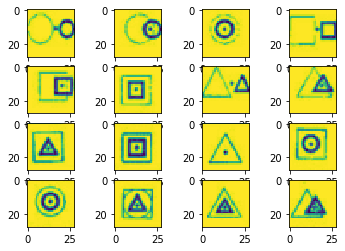

In [71]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,8])

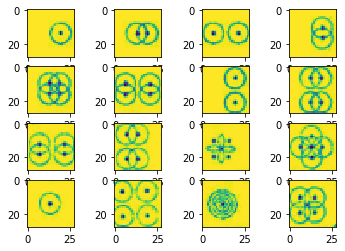

In [72]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,9])

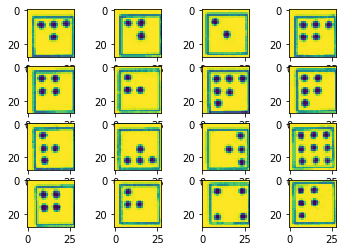

In [73]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,10])

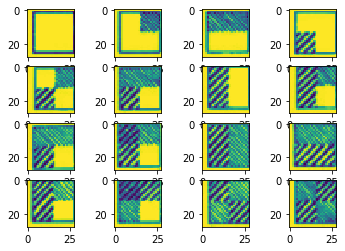

In [74]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,11])

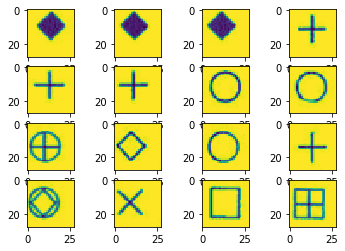

In [75]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,12])

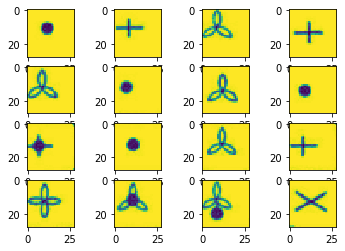

In [76]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,13])

In [77]:
#n=300,fn=50
n=13
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,1,2])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,n],150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,n].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[n],30)

Step 1, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 50, Minibatch Loss= 1725.5236, Train Accuracy= 0.000
Step 100, Minibatch Loss= 341.7837, Train Accuracy= 0.500
Step 150, Minibatch Loss= 3605.4753, Train Accuracy= 0.000
Step 1, Minibatch Loss= 432808.0000, Train Accuracy= 0.500
Step 10, Minibatch Loss= 177355.1562, Train Accuracy= 0.625
Step 20, Minibatch Loss= 10231.3350, Train Accuracy= 0.875
Step 30, Minibatch Loss= 234941.8594, Train Accuracy= 0.375
Testing Accuracy: 0.875


(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[  25483.469, 1557767.4  ],
        [-270441.4  ,  767518.9  ],
        [-425351.16 ,  864991.5  ],
        [ -61858.906, 1844206.4  ],
        [-563860.25 ,  981047.1  ],
        [-412529.53 ,  365768.78 ],
        [-825459.6  , 1717590.5  ],
        [-583071.7  , 1830910.8  ]], dtype=float32))

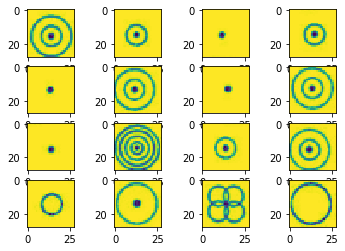

In [79]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,14])

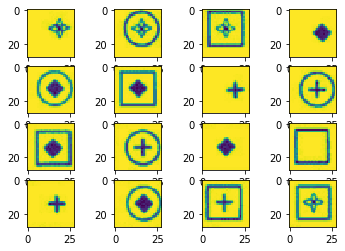

In [80]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,15])

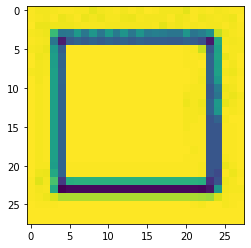

In [95]:
data_f1=data[:,:,5,15].copy()
data_f1[5:20,5:20]=255
plt.imshow(data_f1)

In [100]:
#n=300,fn=50
n=15
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,1,2])
#M12,a12=load(data[:,:,m,12])
data_f=np.zeros((28,28,5))
data_f1=data[:,:,1,15].copy()
data_f1[5:19,10:22]=255
data_f[:,:,0]=data_f1
data_f2=data[:,:,5,15].copy()
data_f2[5:20,5:20]=255
data_f[:,:,1]=data_f2
data_f[:,:,2]=data[:,:,0,15]
data_f[:,:,3]=data[:,:,3,15]
data_f[:,:,4]=data[:,:,6,15]
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data_f,150)
#w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,n],150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,n].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,3,1),w2[:,:,:,:].reshape(5,5,3,6,1),answer[n],30)

Step 1, Minibatch Loss= 564.5161, Train Accuracy= 0.000
Step 50, Minibatch Loss= 406.0273, Train Accuracy= 0.125
Step 100, Minibatch Loss= 300.1274, Train Accuracy= 0.125
Step 150, Minibatch Loss= 134.8448, Train Accuracy= 0.375
Step 1, Minibatch Loss= 66754.0938, Train Accuracy= 0.500
Step 10, Minibatch Loss= 37518.5156, Train Accuracy= 0.625
Step 20, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Testing Accuracy: 0.75


(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[ -41651.527,  291568.8  ],
        [ -13901.311,  207007.16 ],
        [ -62763.184,  296055.16 ],
        [ -13981.912,  263728.78 ],
        [ -60200.49 ,  260315.22 ],
        [ 175776.44 ,  111872.01 ],
        [-168155.55 ,  419250.03 ],
        [-194226.86 ,  268149.5  ]], dtype=float32))

In [2]:
#n=300,fn=50
a=16
n=15
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,a))
w2=np.zeros((5,5,a,a*2))
m=np.array([0,1,2])
#M12,a12=load(data[:,:,m,12])
data_f=np.zeros((28,28,5))
data_f1=data[:,:,1,15].copy()
data_f1[5:19,10:22]=255
data_f[:,:,0]=data_f1
data_f2=data[:,:,5,15].copy()
data_f2[5:20,5:20]=255
data_f[:,:,1]=data_f2
data_f[:,:,2]=data[:,:,0,15]
data_f[:,:,3]=data[:,:,3,15]
data_f[:,:,4]=data[:,:,6,15]
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data_f,1000,a,128)
#w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,n],150)
from fcon import train_fcon
answer=np.load('ans.npy')
train_fcon(data[:,:,:,n].reshape(28,28,16),w1[:,:,:,:].reshape(5,5,1,a,1),w2[:,:,:,:].reshape(5,5,a,2*a,1),answer[n],30,a,8)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 500, Minibatch Loss= 3120.3901, Train Accuracy= 0.578
Step 1000, Minibatch Loss= 37.3720, Train Accuracy= 0.977
Step 1, Minibatch Loss= 924211.7500, Train Accuracy= 0.500
Step 10, Minibatch Loss= 144170.8750, Train Accuracy= 0.875
Step 20, Minibatch Loss= 75811.3125, Train Accuracy= 0.875
Step 30, Minibatch Loss= 446310.7188, Train Accuracy= 0.875
Testing Accuracy: 0.875


(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[-8123452.  , -2508005.5 ],
        [-8998272.  , -2892081.5 ],
        [-8396382.  , -1431357.1 ],
        [-8772645.  , -1007757.3 ],
        [-8203990.  , -1321783.8 ],
        [-9241834.  , -4343876.  ],
        [-9816141.  , -3333079.2 ],
        [-9009889.  ,   483788.72]], dtype=float32))